In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cmath
from IPython.display import Image
%matplotlib inline
plt.rc('text', usetex=True)
plt.rc('font', size=22)
plt.gcf().tight_layout()

<Figure size 432x288 with 0 Axes>

# Problem 1

In [315]:
def implicit(dt):
    gm = 4.*np.pi*np.pi
    def dist(x):
        return np.sqrt(x[0]**2+x[1]**2)

    def fx(t,x):
        return -gm*x/dist(x)**3

    a=1.
    e=0.02
    x0=np.array([0.,a*(1.-e)])
    v0=np.array([-np.sqrt((gm/a)*(1.+e)/(1.-e)),0.])
    t0=0.
    tol=1e-3
    imax=20
    
    tmax=1.0
    nts=int(tmax/dt)
    xs_hist_imp=np.zeros([2,nts])
    ts_hist_imp=np.zeros([nts])
    t=t0
    x=x0
    v=v0
    for i in range(nts):
        it=1
        t=t+dt
        while(1):
            Jfx=gm/dist(x)**5*np.array([[2*x[0]**2-x[1]**2, 3*x[0]*x[1]],[3*x[0]*x[1],2*x[1]**2-x[0]**2]])
            delx=np.linalg.solve(np.identity(2)-dt**2*Jfx,dt*v+dt**2*fx(t,x))
            delv=1/dt*delx-v 
            x= x+delx
            v= v+delv
            it=it+1
            if (it>imax):
                #print('iteration exceeded at t',t,'for timestep size',dt )
                break
            if (np.all(np.absolute(delx)<tol*np.absolute(x))):
                break
        xs_hist_imp[:,i]=x
        ts_hist_imp[i]=t
    return ts_hist_imp ,xs_hist_imp[0,:] ,xs_hist_imp[1,:], np.sqrt((xs_hist_imp[0,-1]-x0[0])**2.+(xs_hist_imp[1,-1]-x0[1])**2.)

In [317]:
delt= 10**np.linspace(-2,-6.,5)
#delt=np.array([10**(-3)])
for idx, case in enumerate(delt):
    [ts,x,y,error]= implicit(case)
    print("Error caused in one time period for time step size %1.2e is %1.2e"%(case, error))

Error caused in one time period for time step size 1.00e-02 is 7.14e+02
Error caused in one time period for time step size 1.00e-03 is 9.65e+01
Error caused in one time period for time step size 1.00e-04 is 1.76e+00
Error caused in one time period for time step size 1.00e-05 is 5.44e-01
Error caused in one time period for time step size 1.00e-06 is 5.52e-02


# Problem2

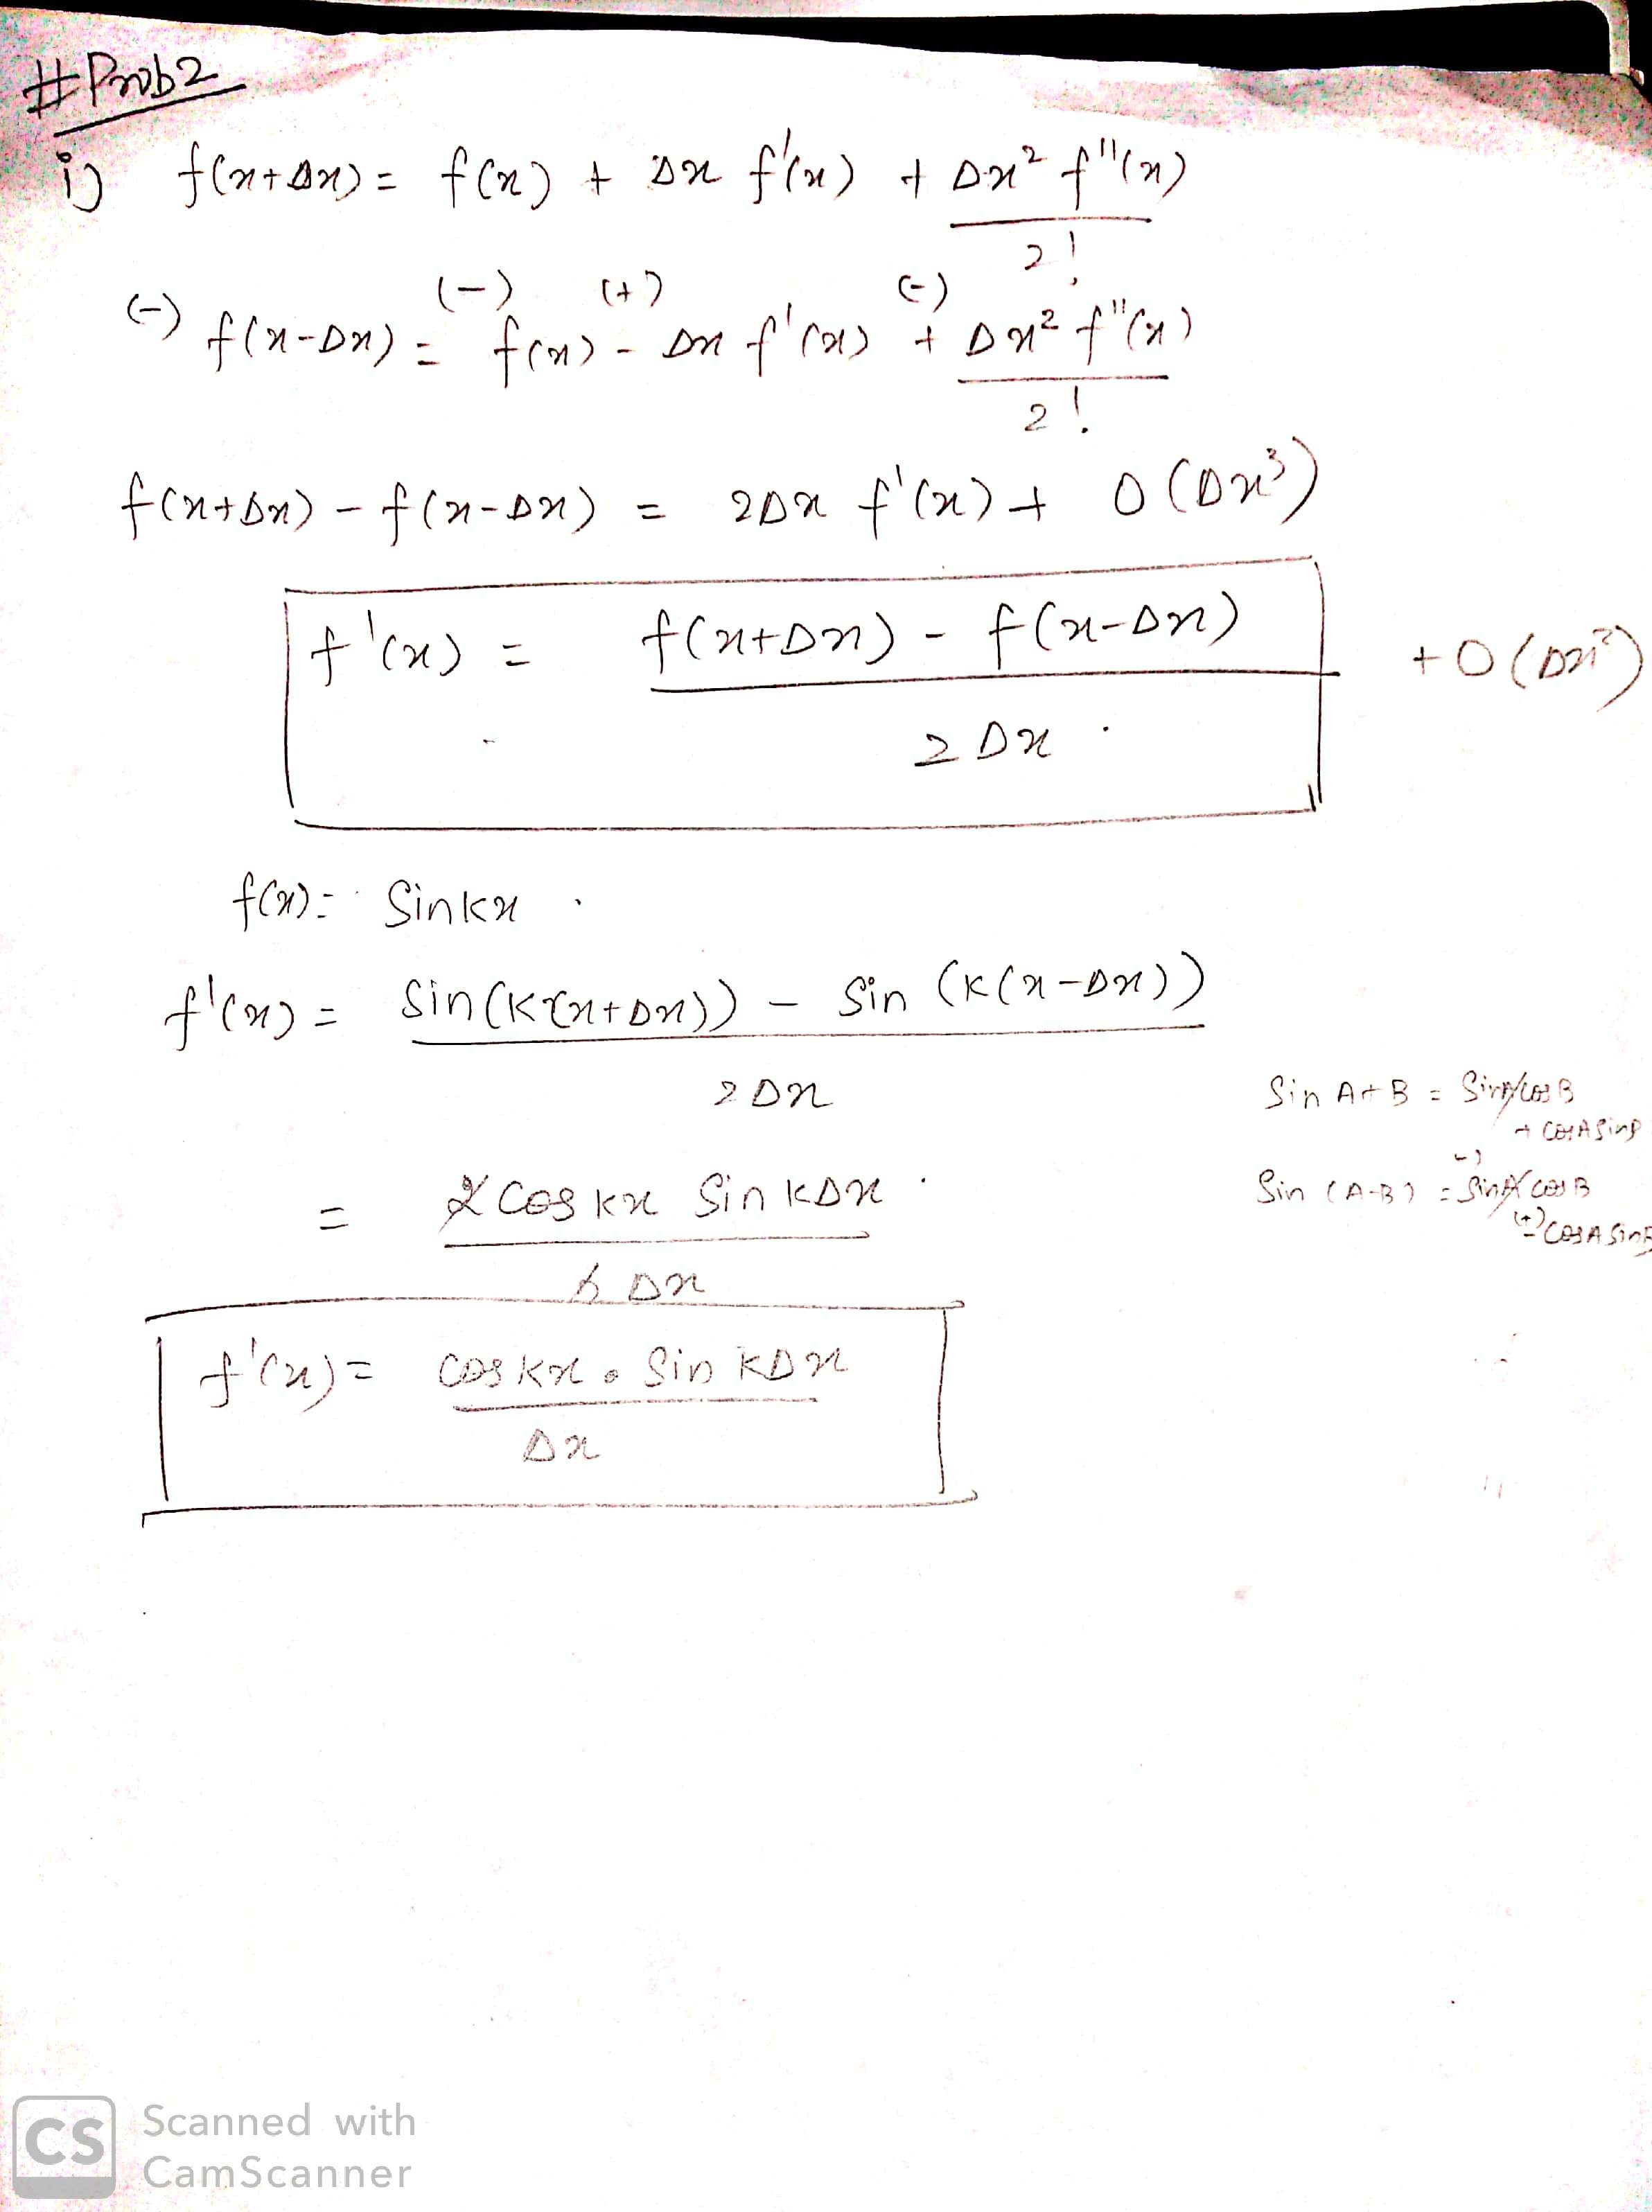

In [197]:
Image("./hw4_1.jpg")

/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


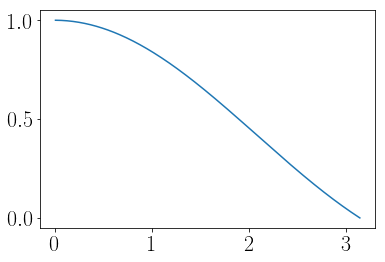

In [131]:
kdelx=np.arange(0,np.pi,1/100)
plt.plot(kdelx,np.sin(kdelx)/(kdelx))

In [238]:
def fastfourier(t,y):
    
    Ts = t[1]-t[0]; # sampling interval
    
    n = len(y) # length of the signal
    frq = np.fft.fftfreq(n,Ts) # two sides frequency range
    frq = frq[range(int(n/2))] # one side frequency range

    
    Y = np.fft.fft(y)*2/n # factor 2 for conserving energy and normalization
    Y = Y[range(int(n/2))]
    Y_imag=Y.imag
    Y_real=Y.real
    
    flag_y_imag = abs(Y_imag) < 10**(-15)  # Where values are low
    Y_imag[flag_y_imag] = 0  # All low values set to 0
    flag_y_real = abs(Y_real) < 10**(-15)  # Where values are low
    Y_real[flag_y_real] = 0  # All low values set to 0    
    
    plt.plot(t,y)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()
    plt.loglog(frq,abs(Y_real),'-o',label=r'$|realY|$') # plotting the spectrum
    plt.loglog(frq,abs(Y_imag),'-s',label=r'$|imagY|$') # plotting the spectrum
    plt.xlabel('Freq (Hz)')
    plt.ylabel(r'$abs(Y)$')
    plt.legend()
    plt.show()
    return frq, Y

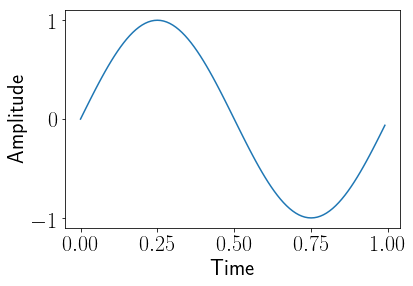

/home/vjeganat/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2207: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/home/vjeganat/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3471: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


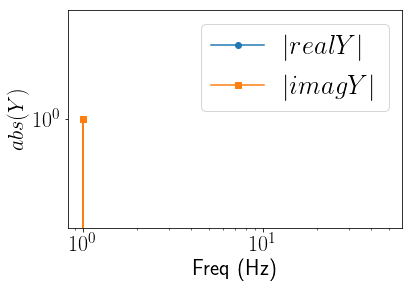

In [239]:
n=100 #number of points
t=np.linspace(0,1-1/n,n)
y = np.sin(2*np.pi*t)
[freq,Y]=fastfourier(t,y)

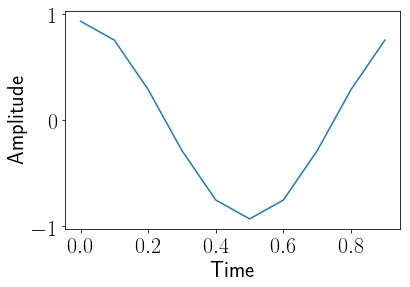

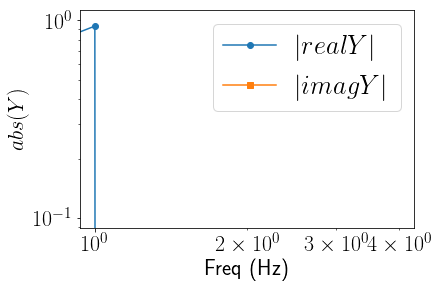

For timestep size 1.00e-01
Calculated k prime 9.3549e-01
Fourier k prime 9.3549e-01


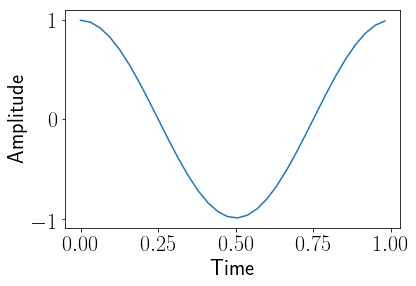

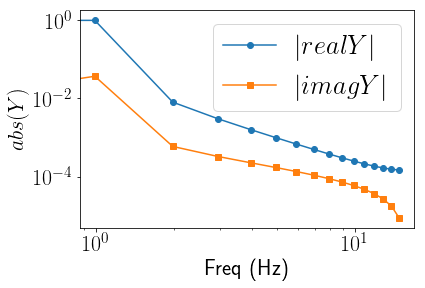

For timestep size 3.16e-02
Calculated k prime 9.9343e-01
Fourier k prime 9.9840e-01


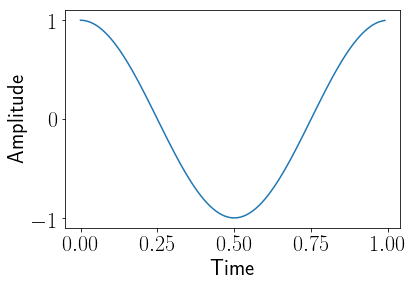

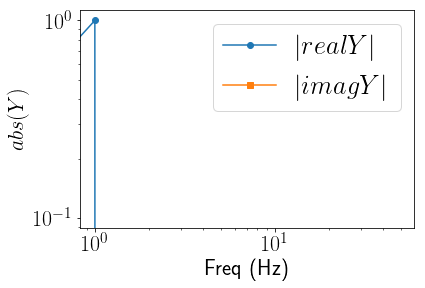

For timestep size 1.00e-02
Calculated k prime 9.9934e-01
Fourier k prime 9.9934e-01


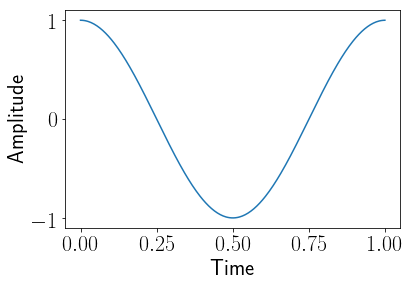

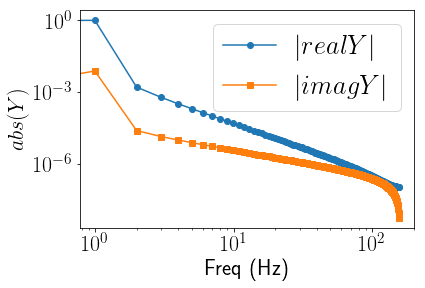

For timestep size 3.16e-03
Calculated k prime 9.9993e-01
Fourier k prime 1.0011e+00


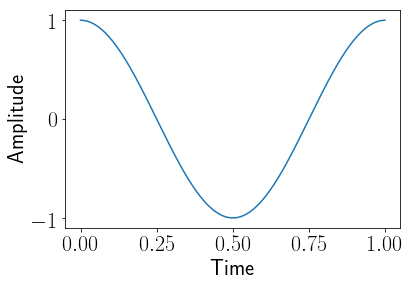

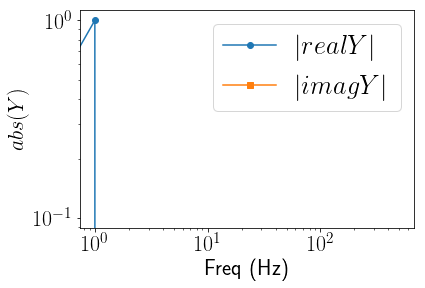

For timestep size 1.00e-03
Calculated k prime 9.9999e-01
Fourier k prime 9.9999e-01


In [243]:
k=1
delta= 10**np.linspace(-1,-3.,5)
for delt in delta:
    t=np.arange(0,1,delt)
    x=2*np.pi*t
    delx=2*np.pi*delt
    y=np.sin(k*delx)*np.cos(k*x)/delx
    [freq,Y]=fastfourier(t,y)
    print("For timestep size %1.2e"%delt)
    print("Calculated k prime %1.4e"%(np.sin(k*delx)/delx))
    print("Fourier k prime %1.4e"%Y.real[np.where(np.round(freq)==k)])

# Problem 3

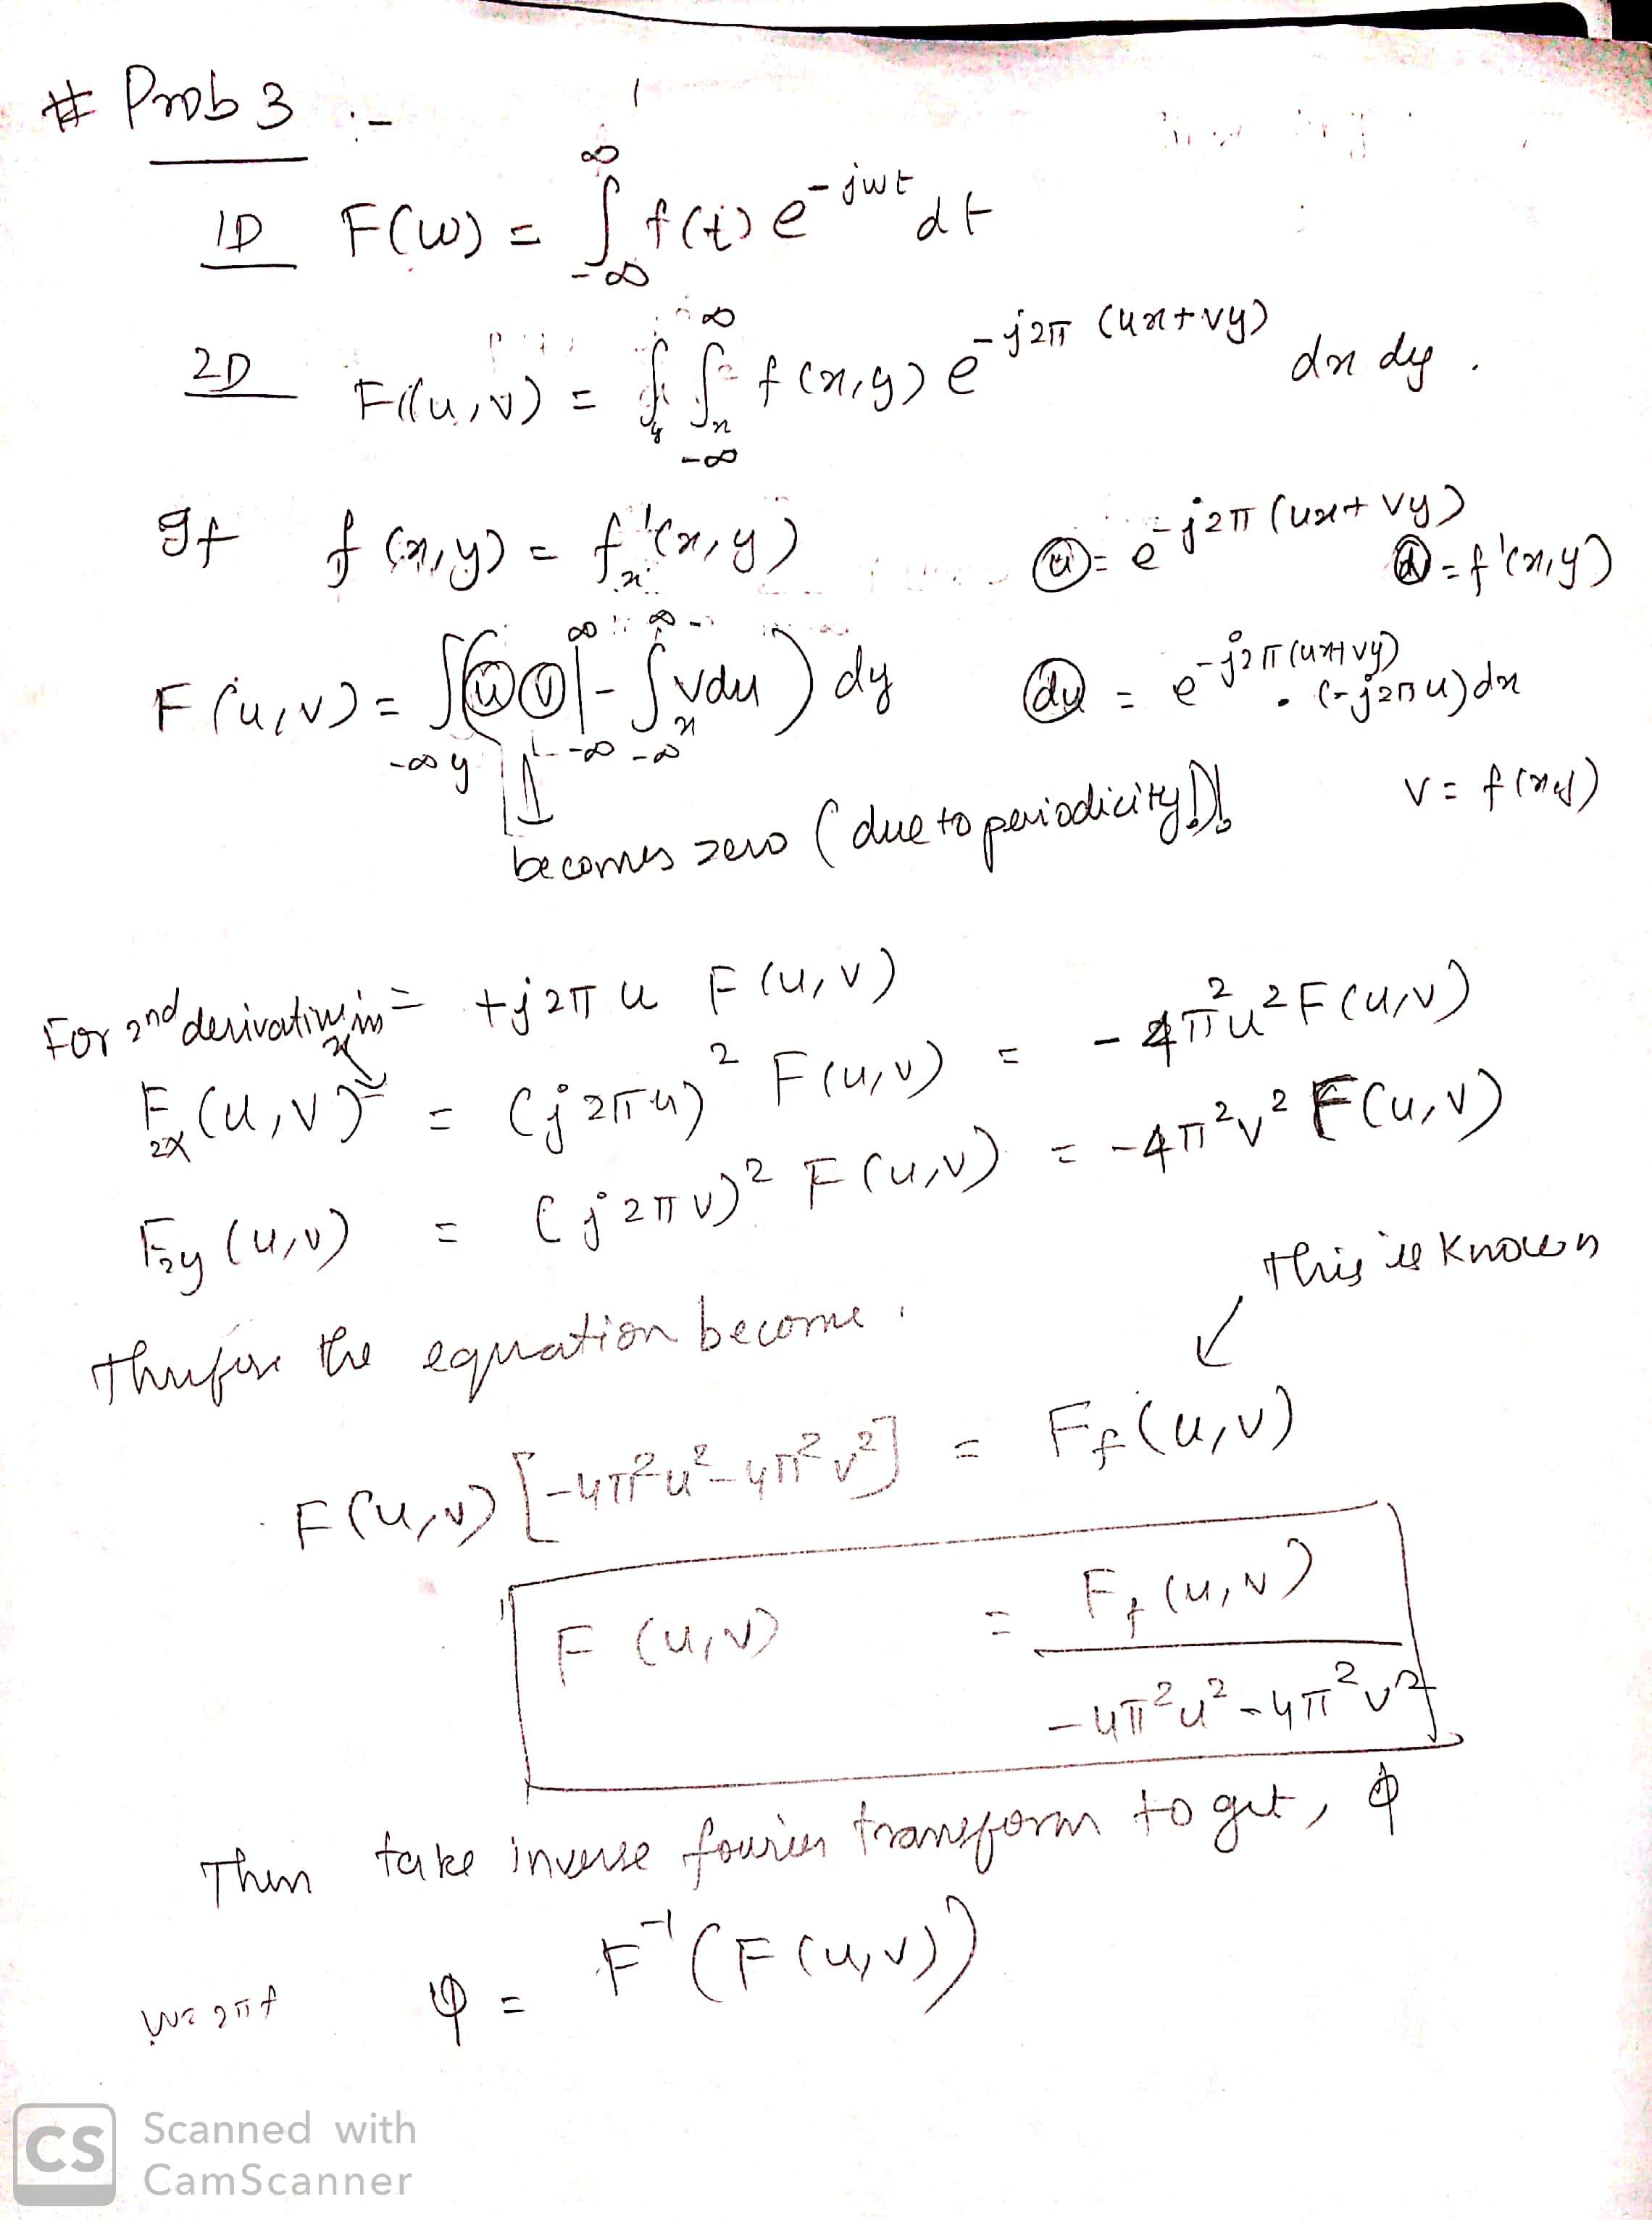

In [198]:
Image("./hw4_2.jpg")

## Couldn't get the analytical solution in problem 3 and 4. 

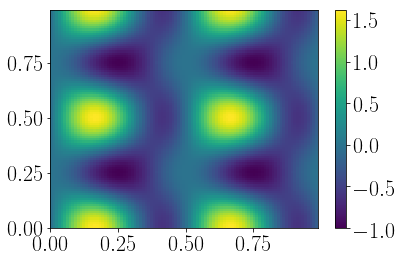

-5.684341886080802e-18


In [219]:
pi=np.pi
t=np.arange(0,1,0.01)
xt, yt = np.meshgrid(t, t)
Aphi=np.sin(2*np.pi*xt)**2*np.cos(4*np.pi*yt) \
+np.sin(4*np.pi*xt)*np.cos(2*np.pi*yt)**2
#Aphi=np.sin(2*np.pi*(xt+yt))
plt.pcolormesh(t,t,Aphi)
plt.colorbar()
plt.show()
print(np.average(Aphi))

/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


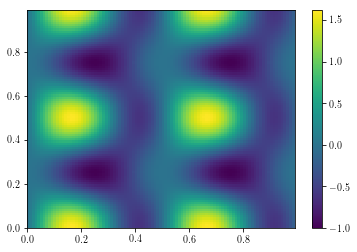

In [9]:
delxy=0.01
t=np.arange(0,1,delxy)
xt, yt = np.meshgrid(t, t)
Ts= t[1]-t[0] #Sample space
n= len(t)
ft=np.fft.fftfreq(n,Ts)#general frequency
ut,vt=np.meshgrid(ft,ft)# x and y frequency
pi = np.pi
f= 8.0*pi**2*np.cos(4.0*pi*yt)*(np.cos(4.0*pi*xt) - \
        np.sin(4.0*pi*xt)) - \
        16.0*pi**2*(np.sin(4.0*pi*xt)*np.cos(2.0*pi*yt)**2 + \
        np.sin(2.0*pi*xt)**2 * np.cos(4.0*pi*yt))


#f=-8*np.pi**2*np.sin(2*np.pi*(xt+yt))
Ff=np.fft.fft2(f)

#To make all the values below 10^-15 zero
Ff.imag = (abs(Ff.imag)>10**(-15))*Ff.imag  # All low values set to 0   
Ff.real = (abs(Ff.real)>10**(-15))*Ff.real

Fuv=Ff/(-4*(np.pi**2.)*(ut**2.+vt**2.))

Fuv[0,0]=0 #Boundary Condition
#Fuv[:,0]=0

fphi=np.fft.ifft2(Fuv)
plt.pcolormesh(t,t,fphi.real)
plt.colorbar()
plt.show()

In [228]:
np.meshgrid(t, t)

[array([[0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
        [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
        [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
        ...,
        [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
        [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99],
        [0.  , 0.01, 0.02, ..., 0.97, 0.98, 0.99]]),
 array([[0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
        [0.01, 0.01, 0.01, ..., 0.01, 0.01, 0.01],
        [0.02, 0.02, 0.02, ..., 0.02, 0.02, 0.02],
        ...,
        [0.97, 0.97, 0.97, ..., 0.97, 0.97, 0.97],
        [0.98, 0.98, 0.98, ..., 0.98, 0.98, 0.98],
        [0.99, 0.99, 0.99, ..., 0.99, 0.99, 0.99]])]

# Problem 4

/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


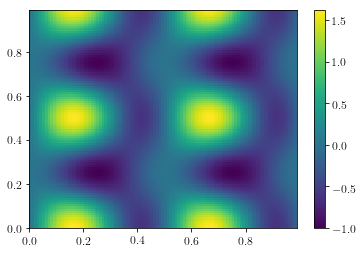

In [231]:
Fphi_mod=0.5*Ff/((np.cos(2*np.pi*ut/n)-1)*delxy**(-2)+(np.cos(2*np.pi*vt/n)-1)*delxy**(-2))
Fphi_mod.imag = (abs(Fphi_mod.imag)>10**(-15))*Fphi_mod.imag  # All low values set to 0   
Fphi_mod.real = (abs(Fphi_mod.real)>10**(-15))*Fphi_mod.real
Fphi_mod[0,0]=0 #Boundary Condition
#Fphi_mod[:,0]=0
fphi_mod=np.fft.ifft2(Fphi_mod)
plt.pcolormesh(t,t,fphi_mod.real)
plt.colorbar()
plt.show()

/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in true_divide
/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide
/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: divide by zero encountered in true_divide
/home/vjeganat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: RuntimeWarning: invalid value encountered in true_divide


[ 16.  32.  64. 128. 256.]
<class 'numpy.ndarray'>
[0.03247367 0.00793068 0.00197121 0.00049209 0.00012298]


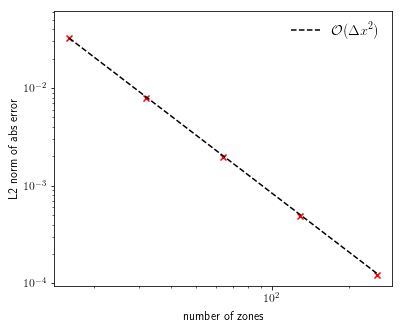

In [223]:
# solve a 2-d Poisson equation by differentiating the discretized
# Poisson equation and then substituting in the inverse Fourier
# transform and solving for the amplitudes in Fourier space.
#
# This is the standard way that texts deal with the Poisson equation
# (see, e.g., Garcia and NR)
#
# Note: we need a periodic problem for an FFT

from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib as mpl

# Use LaTeX for rendering
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'

# the analytic solution
def true(x,y):
    pi = np.pi
    return np.sin(2.0*pi*x)**2*np.cos(4.0*pi*y) + \
        np.sin(4.0*pi*x)*np.cos(2.0*pi*y)**2


# the righthand side
def frhs(x,y):
    pi = np.pi
    return 8.0*pi**2*np.cos(4.0*pi*y)*(np.cos(4.0*pi*x) - 
                                          np.sin(4.0*pi*x)) - \
           16.0*pi**2*(np.sin(4.0*pi*x)*np.cos(2.0*pi*y)**2 + 
                       np.sin(2.0*pi*x)**2 * np.cos(4.0*pi*y))


def doit(Nx, Ny, do_plot=False):

    # create the domain -- cell-centered finite-difference / finite-volume
    xmin = 0.0
    xmax = 1.0

    ymin = 0.0
    ymax = 1.0

    dx = (xmax - xmin)/Nx
    dy = (ymax - ymin)/Ny

    x = (np.arange(Nx) + 0.5)*dx
    y = (np.arange(Ny) + 0.5)*dy

    x2d = np.repeat(x, Ny)
    x2d.shape = (Nx, Ny)

    y2d = np.repeat(y, Nx)
    y2d.shape = (Ny, Nx)
    y2d = np.transpose(y2d)


    # create the RHS
    f = frhs(x2d, y2d)

    # FFT of RHS
    F = np.fft.fft2(f)

    # get the wavenumbers -- we need these to be physical, so divide by dx
    kx = np.fft.fftfreq(Nx)/dx
    ky = np.fft.fftfreq(Ny)/dy

    # make 2-d arrays for the wavenumbers
    kx2d = np.repeat(kx, Ny)
    kx2d.shape = (Nx, Ny)

    ky2d = np.repeat(ky, Nx)
    ky2d.shape = (Ny, Nx)
    ky2d = np.transpose(ky2d)

    # here the FFT frequencies are in the order 0 ... N/2-1, -N/2, ...
    # the 0 component is not a physical frequency, but rather it is
    # the DC signal.  Don't mess with it, since we'll divide by zero
    oldDC = F[0,0]
    F = 0.5*F/( (np.cos(2.0*np.pi*kx2d/Nx) - 1.0)/dx**2 +
                (np.cos(2.0*np.pi*ky2d/Ny) - 1.0)/dy**2)

    F[0,0] = oldDC

    # transform back to real space
    fsolution = np.real(np.fft.ifft2(F))


    # since x is our row in the array, we transpose for the
    # plot
    if do_plot:
        plt.imshow(np.transpose(fsolution),
                   origin="lower", interpolation="nearest",
                   extent=[xmin, xmax, ymin, ymax])

        plt.xlabel("x")
        plt.ylabel("y")

        plt.colorbar()

        plt.tight_layout()

        plt.savefig("poisson_fft.pdf")
        

    # return the error, compared to the true solution
    return np.sqrt(dx*dx*np.sum( ( (fsolution - true(x2d,y2d))**2).flat))


N = [16, 32, 64, 128, 256]
plot = [False]*len(N)
plot[N.index(64)] = True

err = []
for n, p in zip(N, plot):
    err.append(doit(n, n, do_plot=p))


# plot the convergence
plt.clf()

N = np.array(N, dtype=np.float64)
err = np.array(err, dtype=np.float64)

print(N)
print(type(N))
print(err)

plt.scatter(N, err, marker="x", color="r")
plt.plot(N, err[0]*(N[0]/N)**2, "--", color="k", label="$\mathcal{O}(\Delta x^2)$")

ax = plt.gca()

ax.set_xscale('log')
ax.set_yscale('log')

plt.legend(frameon=False)

plt.xlabel("number of zones")
plt.ylabel("L2 norm of abs error")
                        
f = plt.gcf()
f.set_size_inches(5.0,5.0)

plt.savefig("fft-poisson-converge.pdf", bbox_inches="tight")